## Senanur Ağaç - 200102002043

## Lab02

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def mypgmread(filename):
    with open(filename, 'rb') as f:
        header = []
        # PGM dosyasının başlık bilgileri okundu
        while True:
            line = f.readline().decode('ascii').strip()
            if not line or line.startswith('#'):
                continue
            header.append(line)
            if len(header) == 3:
                break

        if len(header) < 3:
            print("Geçersiz PGM dosya formatı.")
            return None

        # Genişlik, yükseklik ve maksimum değer başlık bilgilerinden alındı
        width, height = map(int, header[1].split())
        maxval = int(header[2])

        # Veriyi okundu
        pixel_values = np.fromfile(f, dtype=np.uint8, count=width * height)

        # Veriyi boyutlarına uygun şekilde yeniden şekillendildi
        pixel_values = pixel_values.reshape((height, width))

        return pixel_values, width, height, maxval


### Figure 3.38

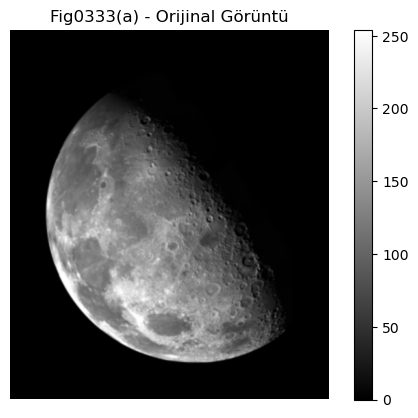

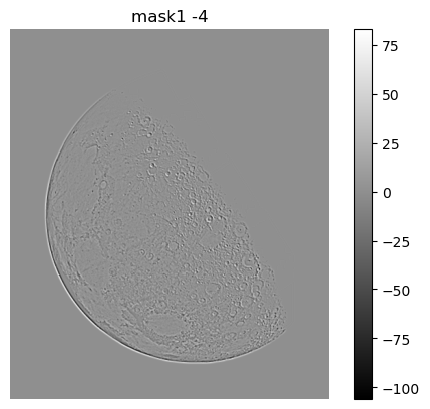

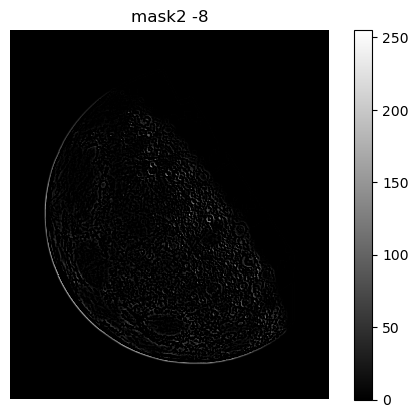

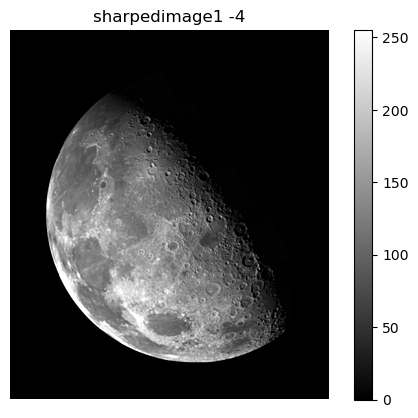

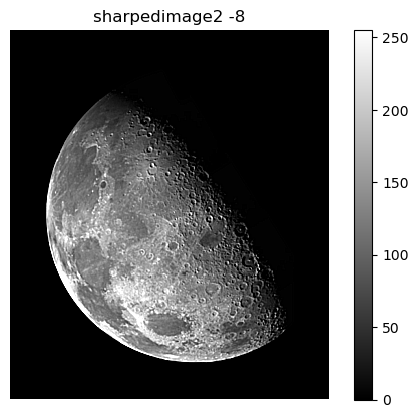

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sharpening(imgval, width, height, maxval,matris,filtersize):

    size = filtersize
    pnum = filtersize//2
    
    padding=np.pad(imgval,pnum,mode='constant')
    mask1_lap=np.zeros([height,width])

    
    sharpedimage1 =np.zeros([height,width])
    
    sharpedimage2 =np.zeros([height,width])
    for i in range(0, height-1):
        for j in range(0, width-1):
            data = padding[i:i+size, j:j+size]
             #median filter ayarlamaları yapılır
            mask1_lap[i][j] = int(np.sum((padding[i:i+size, j:j+size] )* matris))
            
            
            sharpedimage1[i][j] = imgval[i][j] - mask1_lap[i][j]
            
            
    return mask1_lap, sharpedimage1

Fig0338, width, height, maxval = mypgmread('Fig0338.pgm')
plt.imshow(Fig0338, cmap='gray')
plt.colorbar()
plt.title('Fig0333(a) - Orijinal Görüntü')
plt.axis('off')
plt.show()

m1 = np.array([[0,1,0],
                    [1,-4,1],
                    [0,1,0]])
m2 = np.array([[1,1,1],
                    [1,-8,1],
                    [1,1,1]])

mask1_lap, sharpedimage1 = sharpening(Fig0338, width, height, maxval,m1,3)
plt.imshow(mask1_lap, cmap='gray')
plt.colorbar()
plt.title('mask1 -4')
plt.axis('off')
plt.show()

mask2_lap, sharpedimage2 = sharpening(Fig0338, width, height, maxval,m2,3)
plt.imshow(mask2_lap, cmap='gray', vmin= 0, vmax = 255)
plt.colorbar()
plt.title('mask2 -8')
plt.axis('off')
plt.show()


plt.imshow(sharpedimage1, cmap='gray', vmin= 0, vmax = 255)
plt.colorbar()
plt.title('sharpedimage1 -4')
plt.axis('off')
plt.show()


plt.imshow(sharpedimage2, cmap='gray', vmin= 0, vmax = 255)
plt.colorbar()
plt.title('sharpedimage2 -8')
plt.axis('off')
plt.show()





### sharped1image ve sharped2image karşılaştırıldığında sharped2image'in daha keskin olduğu görülmüştür. Bunun sebebi [[1,1,1],[1,-8,1],[1,1,1]] filtresinin kullanılmasıdır.

## Figure 3.40

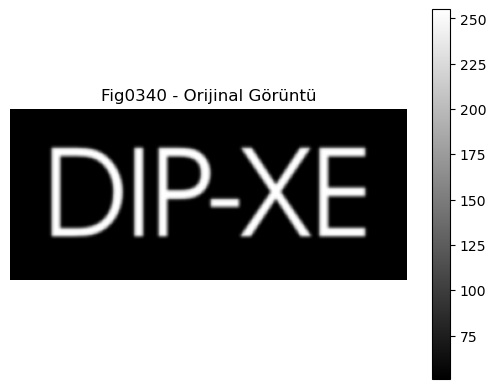

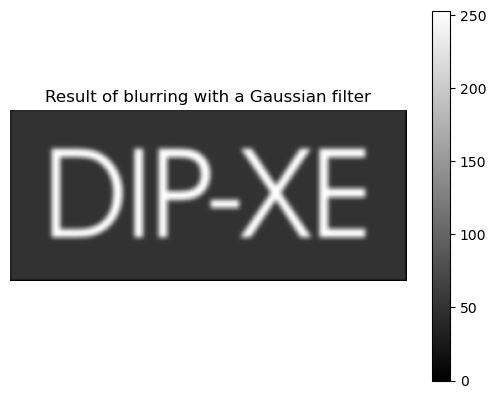

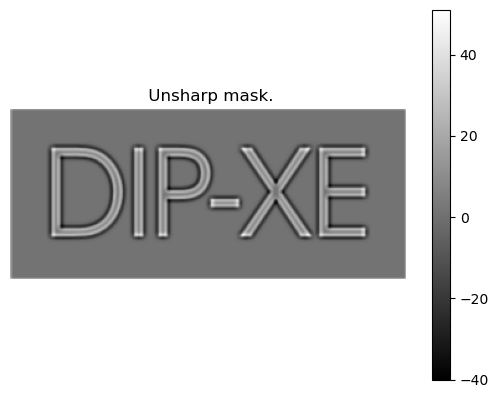

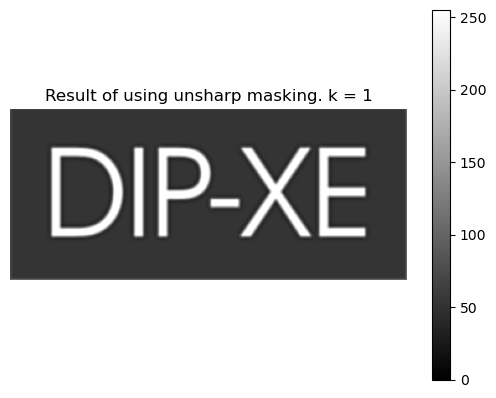

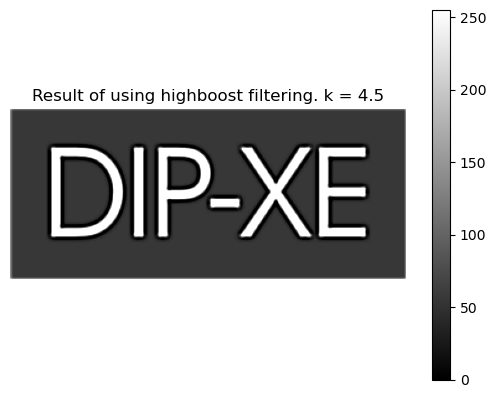

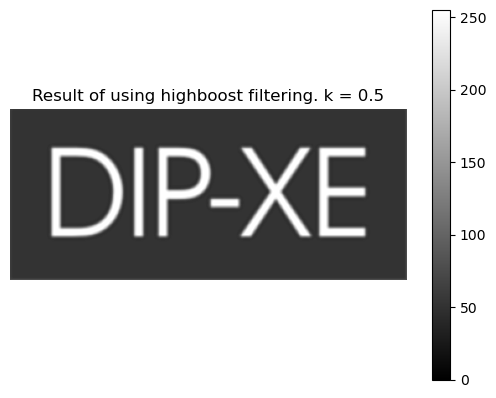

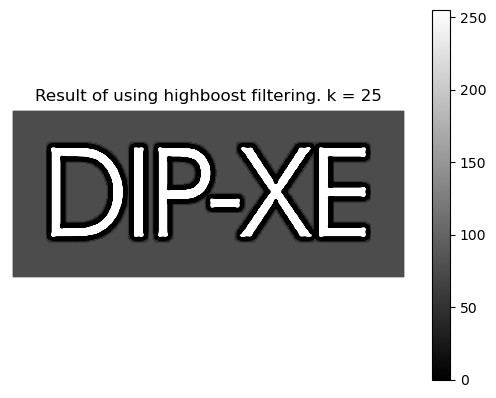

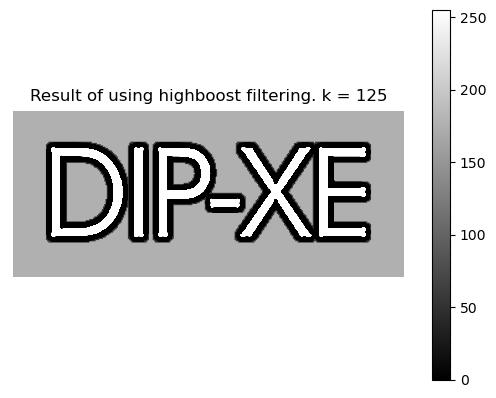

In [4]:
def gaussian_filter(size, sigma):
    if size % 2 == 0:
        raise ValueError('Boyut Tek Sayı Olmalı')

    # Filtre merkezini hesapla
    center = size // 2

    # Merkezden uzaklıkları hesapla
    x = np.arange(-center, center + 1)
    y = np.arange(-center, center + 1)
    
    # İki diziyi ızgaraya dönüştür
    X, Y = np.meshgrid(x, y)
    
    # Gaussian ağırlıklarını hesapla
    weights = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    # Ağırlıkları normalize et
    weights /= np.sum(weights)
    
    return weights
def unsharpmask(imgval,gaus):
    unsharpmask = imgval - gaus
    return unsharpmask

def unsharpmaskresult(imgval,unsharpmask,k):
    unsharpmaskresult = imgval + k*unsharpmask
    return unsharpmaskresult

Fig0340, width, height, maxval = mypgmread('Fig0340(a)(dipxe_text).pgm')
plt.imshow(Fig0340, cmap='gray')
plt.colorbar()
plt.title('Fig0340 - Orijinal Görüntü')
plt.axis('off')
plt.show()

Gaus = gaussian_filter(5,3)
Gaussfilter, image = sharpening(Fig0340, width, height, maxval,Gaus,5)
plt.imshow(Gaussfilter, cmap='gray')
plt.colorbar()
plt.title('Result of blurring with a Gaussian filter')
plt.axis('off')
plt.show()

UnsharpMask = unsharpmask(Fig0340,Gaussfilter)
plt.imshow(UnsharpMask, cmap='gray')
plt.colorbar()
plt.title(' Unsharp mask.')
plt.axis('off')
plt.show()

UnsharpMaskResult = unsharpmaskresult(Fig0340,UnsharpMask,1)
plt.imshow(UnsharpMaskResult, cmap='gray',vmin= 0, vmax = 255)
plt.colorbar()
plt.title('Result of using unsharp masking. k = 1')
plt.axis('off')
plt.show()

UnsharpMaskResult = unsharpmaskresult(Fig0340,UnsharpMask,4.5)
plt.imshow(UnsharpMaskResult, cmap='gray',vmin= 0, vmax = 255)
plt.colorbar()
plt.title('Result of using highboost filtering. k = 4.5')
plt.axis('off')
plt.show()

UnsharpMaskResult = unsharpmaskresult(Fig0340,UnsharpMask,0.5)
plt.imshow(UnsharpMaskResult, cmap='gray',vmin= 0, vmax = 255)
plt.colorbar()
plt.title('Result of using highboost filtering. k = 0.5')
plt.axis('off')
plt.show()

UnsharpMaskResult = unsharpmaskresult(Fig0340,UnsharpMask,25)
plt.imshow(UnsharpMaskResult, cmap='gray',vmin= 0, vmax = 255)
plt.colorbar()
plt.title('Result of using highboost filtering. k = 25')
plt.axis('off')
plt.show()

UnsharpMaskResult = unsharpmaskresult(Fig0340,UnsharpMask,125)
plt.imshow(UnsharpMaskResult, cmap='gray',vmin= 0, vmax = 255)
plt.colorbar()
plt.title('Result of using highboost filtering. k = 125')
plt.axis('off')
plt.show()

### Görüntünün daha keskin olması için k değerinin arttırılması gerekmektedir. Şekillerde de görüldüğü üzere k değeri arttıkça görüntü keskinliği artar, azaldıkça ise keskinlik azalır. Fakat k değerinin çok fazla artması görüntüde bozulmaya sebep olmuştur.

## Figure 3.20

In [5]:
def histogramgraph(imgval, title):
    img = imgval.ravel()
    
    # Histogramı çizin
    plt.figure(figsize=(16, 8))
    
    # İlk sıra
    plt.subplot(2, 4, 1)
    plt.imshow(imgval, cmap='gray', vmin=0, vmax=255)
    plt.colorbar()
    plt.title(title + ' - Original Image')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.hist(img, 256, [0, 256])
    plt.title(title + ' Histogram')

    # PDF (Probability Density Function) grafiği
    pdf = np.histogram(img, bins=256, range=(0, 256), density=True)[0]
    plt.subplot(2, 4, 3)
    plt.plot(pdf)
    plt.title(title + ' PDF')

    # CDF (Cumulative Distribution Function) grafiği
    cdf = np.cumsum(pdf)
    plt.subplot(2, 4, 4)
    plt.plot(cdf)
    plt.title(title + ' CDF')

    # Histogram eşitleme
    normalize = np.round(cdf * 255)
    normalizeVektor = normalize[imgval]
    normimg = normalizeVektor.ravel()
    
    plt.subplot(2, 4, 5)
    plt.imshow(normalizeVektor, cmap='gray', vmin=0, vmax=255)
    plt.colorbar()
    plt.title(title + ' - Equalized Image')
    plt.axis('off')
    # İkinci sıra
    plt.subplot(2, 4, 6)
    plt.hist(normimg, 256, [0, 256])
    plt.title(title + ' Histogram Equalized ')
    

    plt.subplot(2, 4, 7)
    npdf = np.histogram(normimg, bins=256, range=(0, 256), density=True)[0]
    plt.plot(npdf)
    plt.title(title + ' Equalized Image PDF')

    ncdf = np.cumsum(npdf)
    plt.subplot(2, 4, 8)
    plt.plot(ncdf)
    plt.title(title + ' Equalized Image CDF')

    plt.tight_layout()
    plt.show()




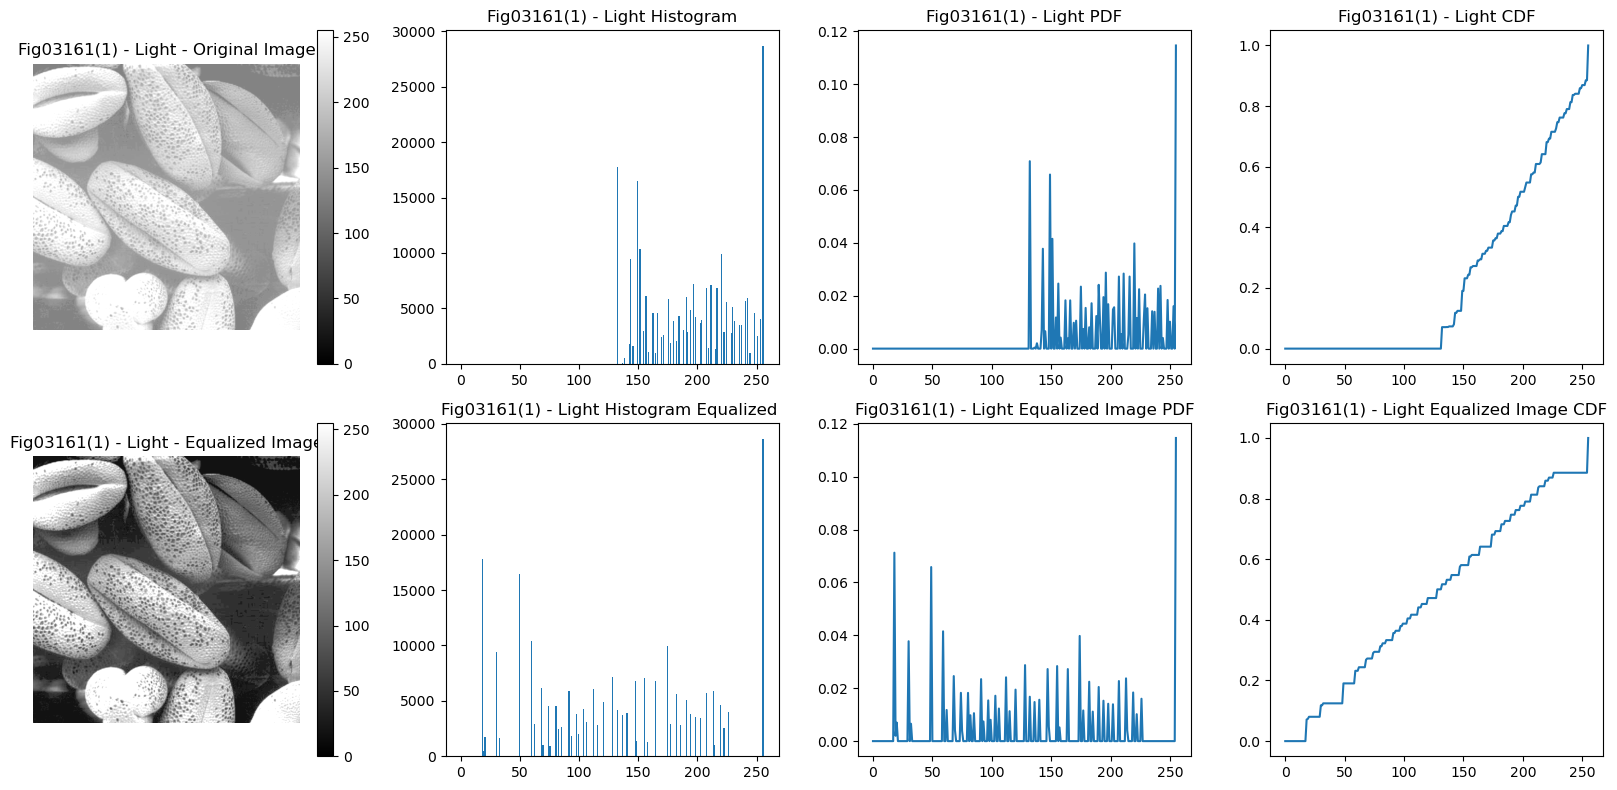

In [6]:
# İlk görüntü
Fig03161, _, _, _ = mypgmread('Fig0316(1).pgm')
histogramgraph(Fig03161, 'Fig03161(1) - Light')


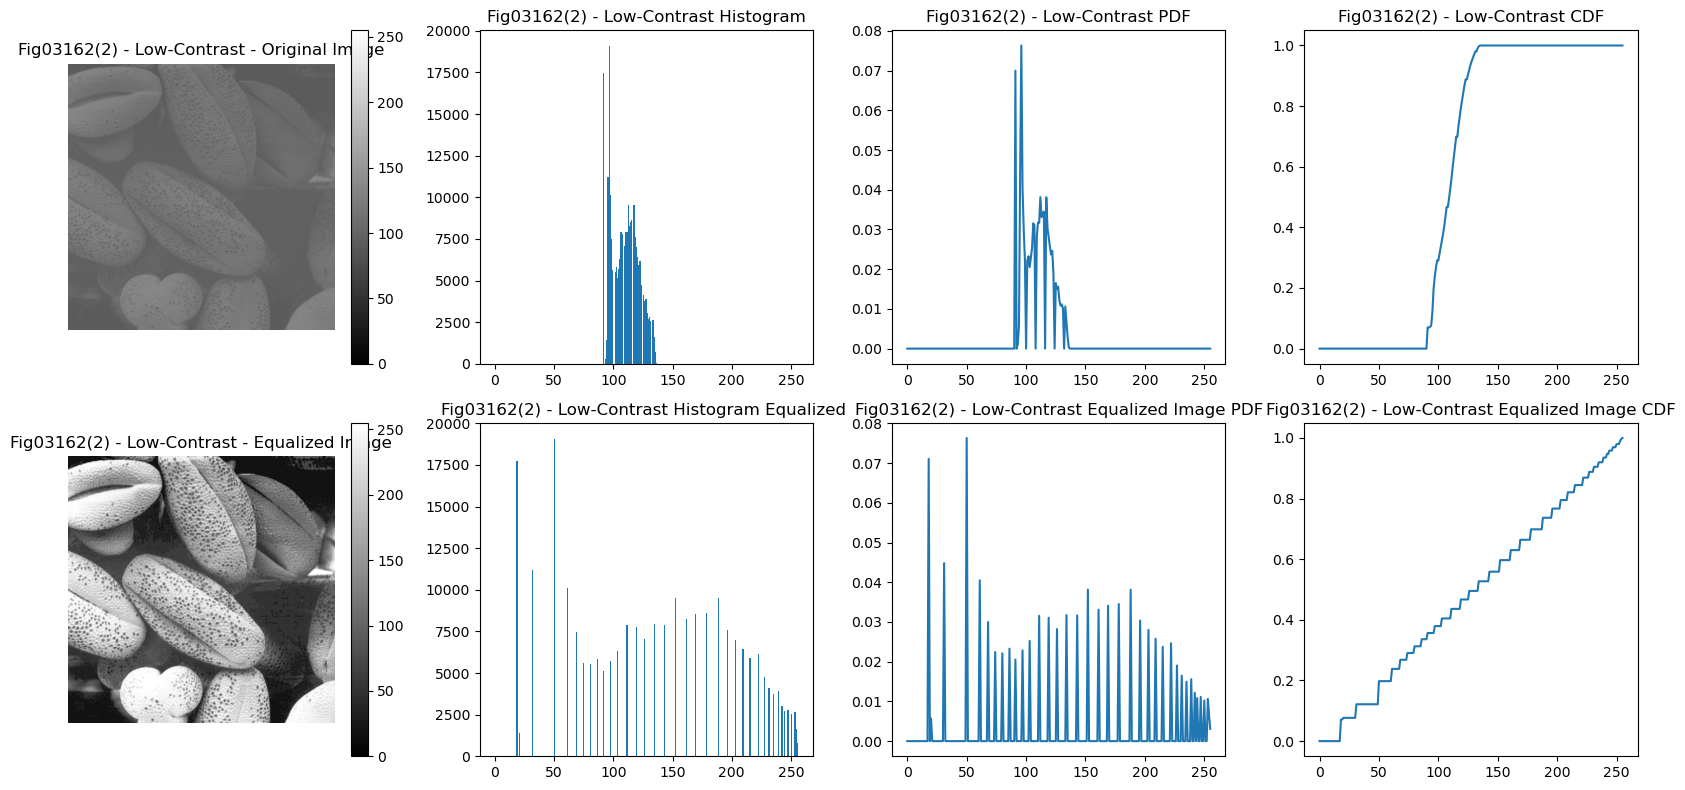

In [7]:
# İkinci görüntü
Fig03162, _, _, _ = mypgmread('Fig0316(2).pgm')
histogramgraph(Fig03162, 'Fig03162(2) - Low-Contrast')


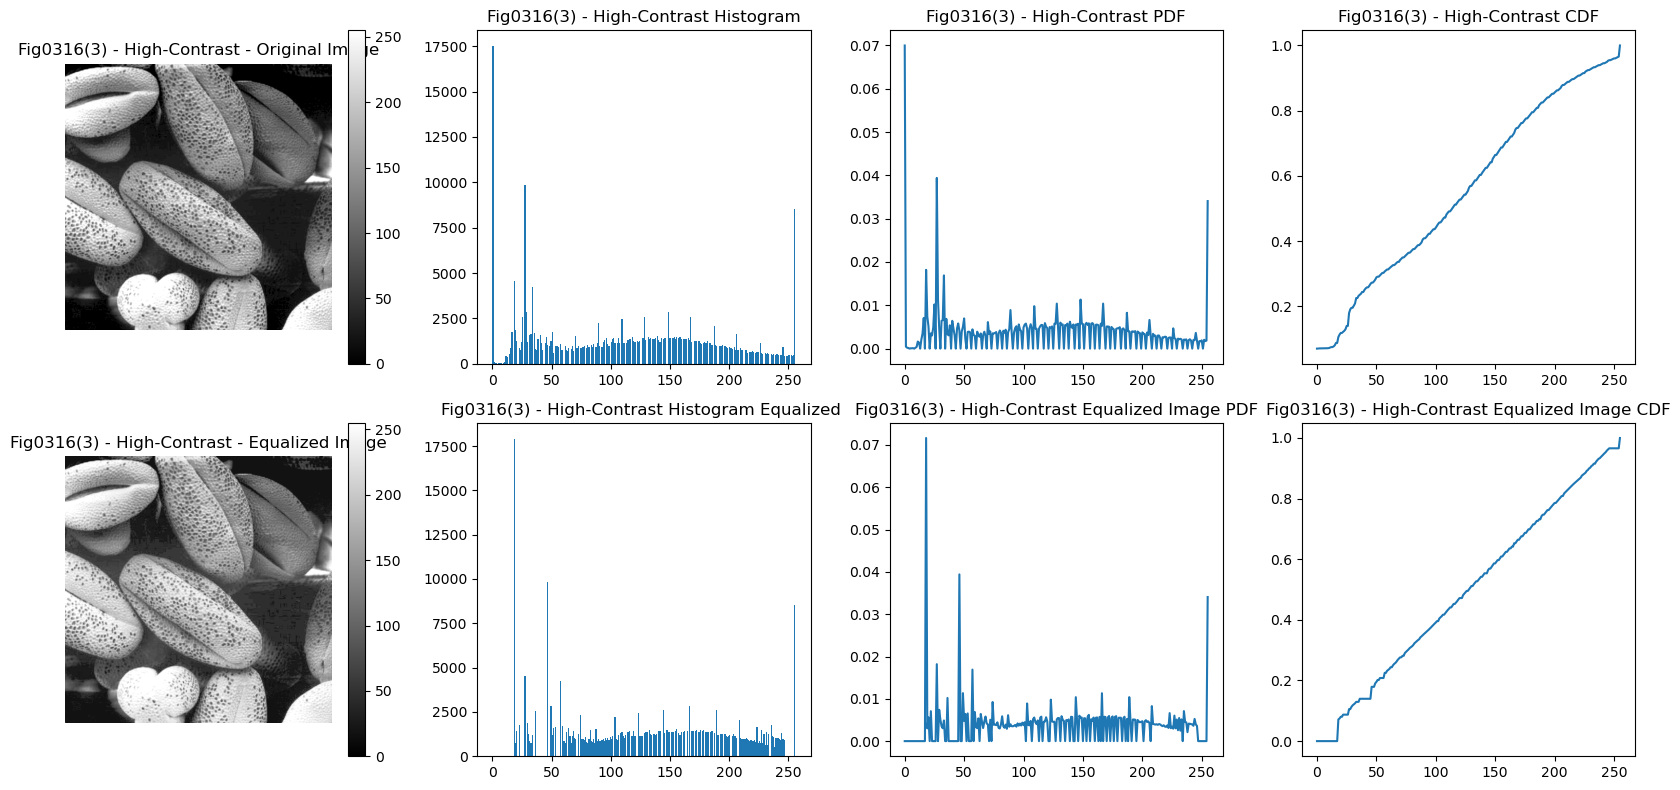

In [8]:

# Üçüncü görüntü
Fig03163, _, _, _ = mypgmread('Fig0316(3).pgm')
histogramgraph(Fig03163, 'Fig0316(3) - High-Contrast')


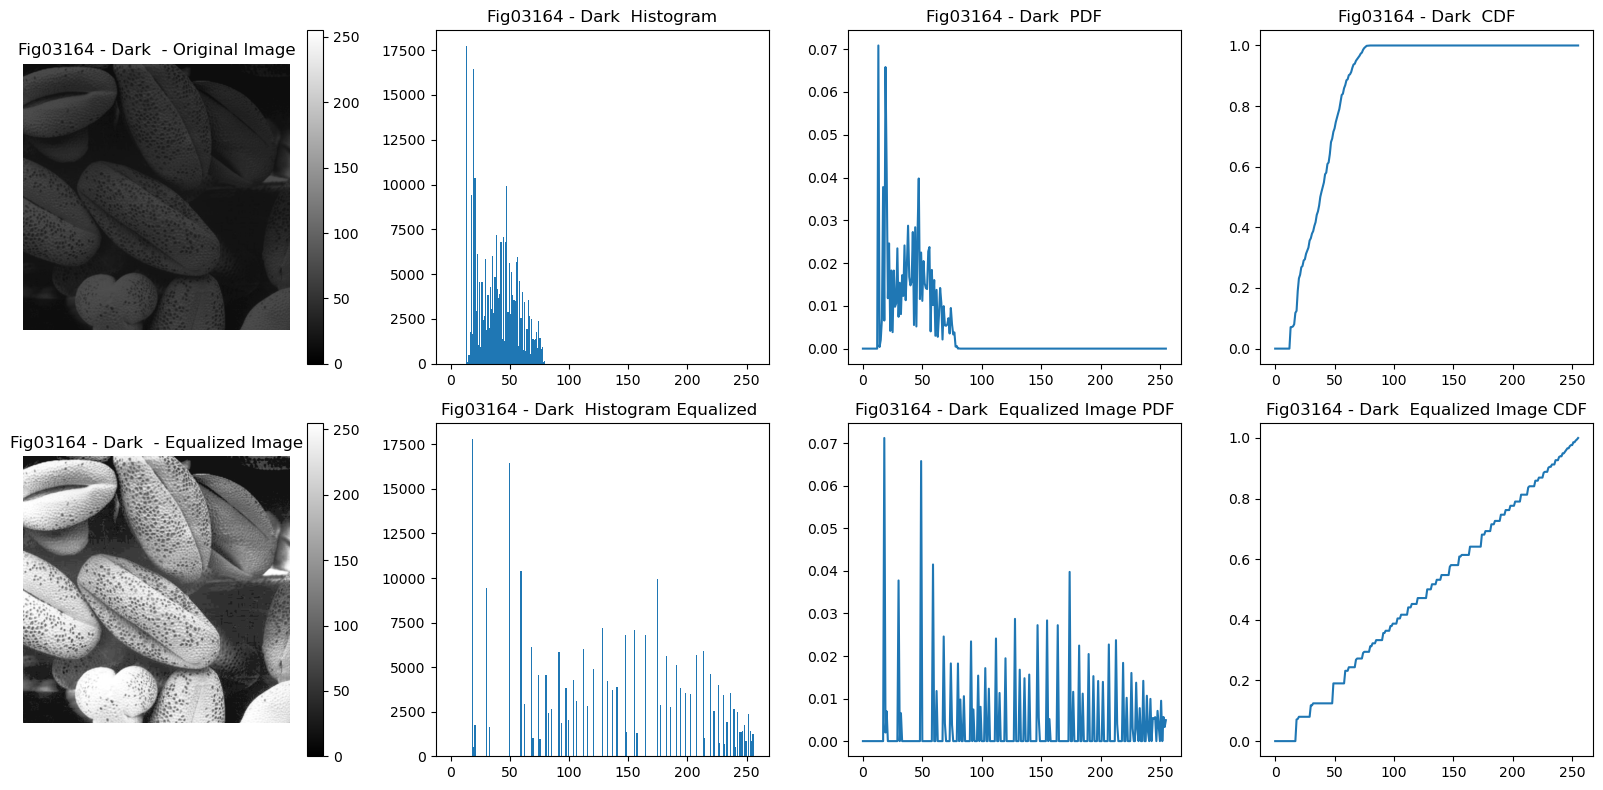

In [9]:

# Dördüncü görüntü
Fig03164, _, _, _ = mypgmread('Fig0316(4).pgm')
histogramgraph(Fig03164, 'Fig03164 - Dark ')

### Orijinal görüntülerde histogram dağılımları incelendiğinde görüntünün piksel değerine göre bir yerde daha çok toplandığı görülmüştür. Örneğin dark image'de 0 ve 75 aralağında yoğunlaşmıştır. Bu 4 görüntü içerisinden en düzgün dağılım gösteren histogram grafiğinin high constrata ait olan görüntünün olduğu göülmüştür. Daha sonra sırasıyla pdf ve cdf'i alınmıştır ve resim normalize edilerek aynı grafikler çıkarılmıştır. Normalize edilme işleminin başarılı olduğu histogram grafiğinin uniform şekilde dağılmasıyla görülmüştür. Ayrıca cdf grafiklerine bakıldığında baştaki görüntülerde bir yere toplanma gözükürken daha normalize edilmiş görüntüde cdf grafiğinin doğrusal olduğu görülmüştür.